# Scaling

- why? visualization (audience: data scientists); to get a normal distribution, usually stats tests; modeling
- when? prep / exploration; when you have to; log transformation

## Motivating Example

Does gender matter for common college entrance exams?

In [81]:
import pandas as pd
import numpy as np
import pydataset
import sklearn.preprocessing
import matplotlib.pyplot as plt

df = pydataset.data('sat.act')
df

,gender,education,age,ACT,SATV,SATQ
29442,2,3,19,24,500,500.0
29457,2,3,23,35,600,500.0
29498,2,3,20,21,480,470.0
29503,1,4,27,26,550,520.0
29504,1,2,33,31,600,550.0
...,...,...,...,...,...,...
39915,1,3,25,30,500,500.0
39937,1,4,40,27,613,630.0
39951,2,3,24,31,700,630.0
39961,1,4,35,32,700,780.0


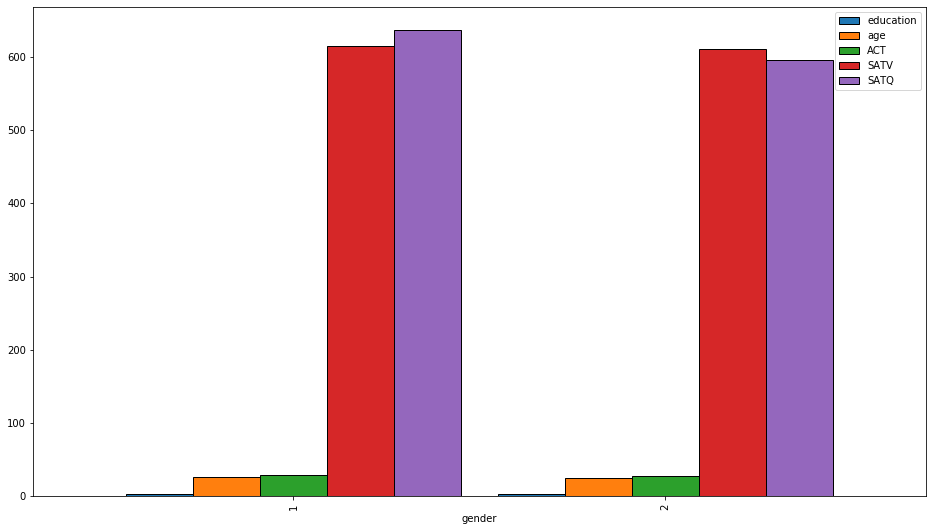

In [8]:
df.groupby('gender').mean().plot.bar(figsize=(16, 9), ec='black', width=.9)

In [12]:
cols = ['education', 'age', 'ACT', 'SATQ', 'SATV']

scaler = sklearn.preprocessing.StandardScaler()

df[cols] = scaler.fit_transform(df[cols])

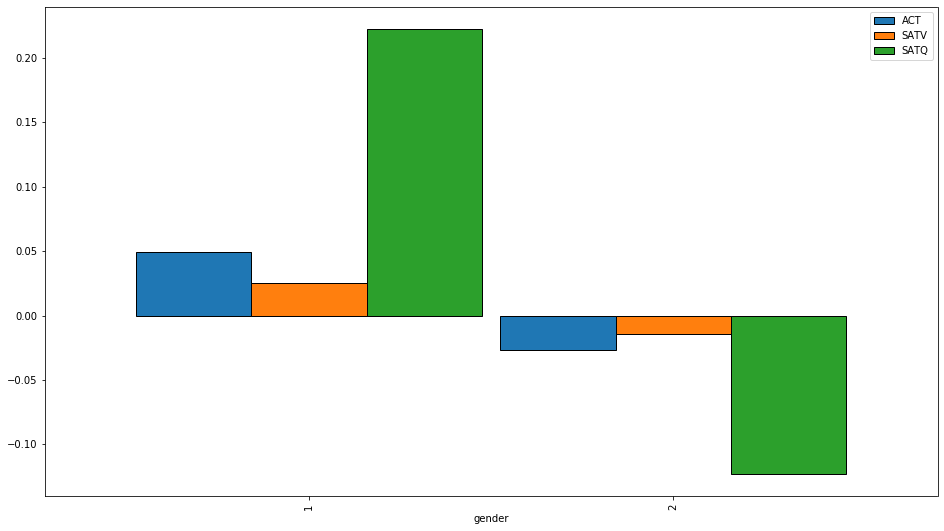

In [14]:
df[['gender', 'ACT', 'SATV', 'SATQ']].groupby('gender').mean().plot.bar(figsize=(16, 9), ec='black', width=.95)

## Train Test Split

<div style="display: flex; text-align: center;">
    <div style="padding: 2em 0; border: 1px solid black; width: 80%">Train</div>
    <div style="padding: 2em 0; border: 1px solid black; width: 20%">Test</div>
</div>

Purpose: to get an idea of how our model performs with unseen data.

In [15]:
from sklearn.model_selection import train_test_split

2 ways to train test split:

1. 2 seperate train and test datasets
2. Split our data into X and y, and have 4 datasets: X_train, y_train, X_test, y_test

In [17]:
mpg = pydataset.data('mpg')
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [65]:
train, test = train_test_split(mpg, test_size=.2, random_state=42)

print('# of rows in train', train.shape[0])
print('% of train:', train.shape[0] / mpg.shape[0])
print('# of rows in test', test.shape[0])
print('% of test:', test.shape[0] / mpg.shape[0])

test.head()

# of rows in train 187
% of train: 0.7991452991452992
# of rows in test 47
% of test: 0.20085470085470086


,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
70,dodge,ram 1500 pickup 4wd,4.7,2008,8,manual(m6),4,9,12,e,pickup
207,toyota,toyota tacoma 4wd,4.0,2008,6,auto(l5),4,16,20,r,pickup
181,toyota,camry,2.2,1999,4,auto(l4),f,21,27,r,midsize
10,audi,a4 quattro,2.0,2008,4,manual(m6),4,20,28,p,compact
128,jeep,grand cherokee 4wd,4.7,2008,8,auto(l5),4,14,19,r,suv


In [73]:
X = mpg[['cyl', 'displ']]
y = mpg['hwy']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)

print('X_train:', X_train.shape)
print('X_test:', X_test.shape)
print('y_train:', y_train.shape)
print('y_test:', y_test.shape)

assert X_train.shape[0] == y_train.shape[0]
assert X_test.shape[0] == y_test.shape[0]

X_train: (175, 2)
X_test: (59, 2)
y_train: (175,)
y_test: (59,)


MinMax Scaling

$$ x' = \frac{x - \text{min}(x)}{\text{max}(x) - \text{min}(x)} $$

0 - 1

In [77]:
x = pd.Series([-4, -2, 1, 16])
print(x)

(x - x.min()) / (x.max() - x.min())

0    -4
1    -2
2     1
3    16
dtype: int64


0    0.00
1    0.10
2    0.25
3    1.00
dtype: float64

When scaling, scaling parameters (e.g. min and max in min-max scaling) should be learned from the training dataset, then applied to the test dataset.

3. Linear Scaling

    - MinMax: everything between 0 and 1
        $$ x' = \frac{x - \text{min}(x)}{\text{max}(x) - \text{min}(x)} $$
    - Standard: a zscore, standard deviations from the mean, **center** + **scale**
        $$ x' = \frac{x - \bar{x}}{s_x} $$
    - Robust: robust to and preserves outliers
        $$ x' = \frac{x - \text{med}(x)}{\text{IQR}_x} $$
        

4. Non-linear Scaling

    - Power Transform: choose $\lambda$ (-5 to 5) s.t. the standard deviation of the resulting distribution is the smallest

        Yeo-Johnson

        $$
        \begin{split}x_i^{(\lambda)} =
        \begin{cases}
         [(x_i + 1)^\lambda - 1] / \lambda & \text{if } \lambda \neq 0, x_i \geq 0, \\[8pt]
        \ln{(x_i) + 1} & \text{if } \lambda = 0, x_i \geq 0 \\[8pt]
        -[(-x_i + 1)^{2 - \lambda} - 1] / (2 - \lambda) & \text{if } \lambda \neq 2, x_i < 0, \\[8pt]
         - \ln (- x_i + 1) & \text{if } \lambda = 2, x_i < 0
        \end{cases}\end{split}
        $$

        Box-Cox (only positive data)

        $$
        \begin{split}x_i^{(\lambda)} =
        \begin{cases}
        \dfrac{x_i^\lambda - 1}{\lambda} & \text{if } \lambda \neq 0, \\[8pt]
        \ln{(x_i)} & \text{if } \lambda = 0,
        \end{cases}\end{split}
        $$
    
    - Quantile: data points are "ranked", for a normal output, highest_orig -> highest_norm and then 2nd highest, etc
    
    - Log
    
        $$ x' = \log_b{x} $$
        
        $$ b^{x'} = x $$
        
        Sometimes you can just set the x/y scale w/ matplotlib

(array([ 12.,  36., 117., 172., 231., 200., 142.,  69.,  18.,   3.]),
 array([ 435.52377624,  557.05273103,  678.58168582,  800.11064061,
         921.6395954 , 1043.16855019, 1164.69750497, 1286.22645976,
        1407.75541455, 1529.28436934, 1650.81332413]),
 <a list of 10 Patch objects>)

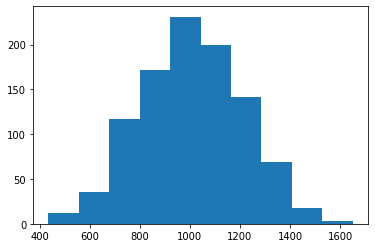

In [83]:
x = np.random.normal(1000, 200, 1000)

plt.hist(x)

(array([ 12.,  36., 117., 172., 231., 200., 142.,  69.,  18.,   3.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

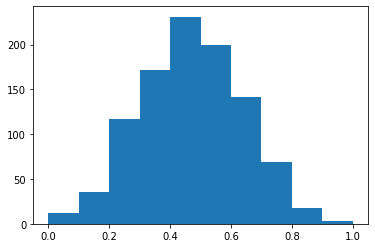

In [85]:
x_minmax_scaled = (x - x.min()) / (x.max() - x.min())
plt.hist(x_minmax_scaled)

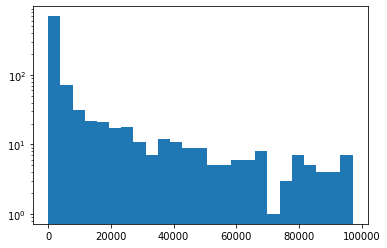

In [93]:
x = 10 ** np.random.uniform(0, 5, 1000)

plt.hist(x, bins=25)
plt.yscale('log')

## Sklearn Implementation

1. Make the thing
2. Fit the thing
3. Use the thing

In [100]:
import sklearn.preprocessing
import pydataset

df = pydataset.data('sat.act')
df.head()

,gender,education,age,ACT,SATV,SATQ
29442,2,3,19,24,500,500.0
29457,2,3,23,35,600,500.0
29498,2,3,20,21,480,470.0
29503,1,4,27,26,550,520.0
29504,1,2,33,31,600,550.0


In [108]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# 1. Make the thing
scaler = sklearn.preprocessing.MinMaxScaler()
# 2. Fit the thing
scaler.fit(df[['age']])
# 3. Use the thing
df['age_scaled'] = scaler.transform(df[['age']])

In [109]:
df.head()

,gender,education,age,ACT,SATV,SATQ,age_scaled
29442,2,3,19,24,500,500.0,0.115385
29457,2,3,23,35,600,500.0,0.192308
29498,2,3,20,21,480,470.0,0.134615
29503,1,4,27,26,550,520.0,0.269231
29504,1,2,33,31,600,550.0,0.384615


In [111]:
# Example of why we need .fit
scaler = sklearn.preprocessing.MinMaxScaler()
scaler.transform(df[['age']])

NotFittedError: This MinMaxScaler instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [114]:
# how to transform multiple columns?
df_scaled = df.copy()

scaler = sklearn.preprocessing.MinMaxScaler()

scaler.fit(df[['age']])
df_scaled['age'] = scaler.transform(df[['age']])

scaler.fit(df[['ACT']])
df_scaled['ACT'] = scaler.transform(df[['ACT']])

scaler.fit(df[['SATV']])
df_scaled['SATV'] = scaler.transform(df[['SATV']])

In [116]:
df_scaled.head()

,gender,education,age,ACT,SATV,SATQ,age_scaled
29442,2,3,0.115385,0.636364,0.500000,500.0,0.115385
29457,2,3,0.192308,0.969697,0.666667,500.0,0.192308
29498,2,3,0.134615,0.545455,0.466667,470.0,0.134615
29503,1,4,0.269231,0.696970,0.583333,520.0,0.269231
29504,1,2,0.384615,0.848485,0.666667,550.0,0.384615


In [125]:
# scaling multiple columns at once
scaler = sklearn.preprocessing.MinMaxScaler()

df_scaled = df.copy()

scaler.fit(df[['age', 'ACT', 'SATV', 'SATQ']])

df_scaled[['age', 'ACT', 'SATV', 'SATQ']] = scaler.transform(df[['age', 'ACT', 'SATV', 'SATQ']])

df_scaled.head()

,gender,education,age,ACT,SATV,SATQ,age_scaled
29442,2,3,0.115385,0.636364,0.500000,0.500000,0.115385
29457,2,3,0.192308,0.969697,0.666667,0.500000,0.192308
29498,2,3,0.134615,0.545455,0.466667,0.450000,0.134615
29503,1,4,0.269231,0.696970,0.583333,0.533333,0.269231
29504,1,2,0.384615,0.848485,0.666667,0.583333,0.384615


In [127]:
# how to pull the last 3 columns
df.iloc[:, -3:] # all the rows and the last 3 columns
df.iloc[:5, :2] # first 5 rows and first 2 columns

,gender,education
29442,2,3
29457,2,3
29498,2,3
29503,1,4
29504,1,2


## Why do we need to copy?

In [120]:
mpg = pydataset.data('mpg')
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [122]:
mpg_scaled = mpg

scaler = sklearn.preprocessing.MinMaxScaler()

scaler.fit(mpg[['hwy']])
mpg_scaled['hwy'] = scaler.transform(mpg[['hwy']])
mpg_scaled.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,0.53125,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,0.53125,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,0.59375,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,0.56250,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,0.43750,p,compact


In [123]:
# without .copy, we modify the original dataframe
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,0.53125,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,0.53125,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,0.59375,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,0.56250,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,0.43750,p,compact


Scaling with train and test datsets

In [141]:
df = pydataset.data('sat.act')
df.head()

# do the train test split
train, test = train_test_split(df, random_state=123, train_size=.8)

In [139]:
# train is still a dataframe at this point
train.head()

,gender,education,age,ACT,SATV,SATQ
36381,1,4,24,31,750,650.0
30566,2,3,30,28,680,590.0
37691,1,2,20,25,500,300.0
38445,2,3,46,30,600,600.0
38511,2,1,18,28,710,600.0


How do we scale the test data based on scaling parameters in the training data?

In [135]:
scaler = sklearn.preprocessing.MinMaxScaler()

scaler.fit(train)

train_scaled = scaler.transform(train)
# notice there is *not* another call to .fit
test_scaled = scaler.transform(test)

In [140]:
# once we do .transform, we get back a 2d numpy array
train_scaled

array([[0.        , 0.8       , 0.18      , 0.76190476, 0.91071429,
        0.7       ],
       [1.        , 0.6       , 0.3       , 0.61904762, 0.78571429,
        0.58      ],
       [0.        , 0.4       , 0.1       , 0.47619048, 0.46428571,
        0.        ],
       [1.        , 0.6       , 0.62      , 0.71428571, 0.64285714,
        0.6       ],
       [1.        , 0.2       , 0.06      , 0.61904762, 0.83928571,
        0.6       ],
       [1.        , 0.8       , 0.32      , 0.76190476, 0.57142857,
        0.76      ],
       [0.        , 1.        , 0.86      , 0.9047619 , 0.77678571,
        0.76      ],
       [1.        , 0.        , 0.06      , 0.76190476, 0.71428571,
        0.74      ],
       [1.        , 0.8       , 0.16      , 0.33333333, 0.28571429,
        0.6       ],
       [1.        , 0.6       , 0.04      , 0.80952381, 0.53571429,
        0.58      ],
       [1.        , 0.6       , 0.08      , 1.        , 0.875     ,
        0.94      ],
       [1.        , 1

In [145]:
# converting the scaled data back to a dataframe
scaler = sklearn.preprocessing.MinMaxScaler()

scaler.fit(train)

# turn the resulting 2d numpy array into a dataframe
train_scaled = pd.DataFrame(scaler.transform(train), columns=train.columns, index=train.index)

train_scaled

,gender,education,age,ACT,SATV,SATQ
37130,0.0,0.6,0.115385,0.714286,0.416667,0.416667
34812,1.0,0.6,0.173077,0.809524,0.833333,0.816667
33345,1.0,0.6,0.134615,0.428571,0.666667,0.433333
34583,1.0,0.6,0.230769,0.571429,0.500000,0.500000
38079,1.0,0.6,0.115385,0.761905,0.883333,0.800000
...,...,...,...,...,...,...
30899,1.0,0.6,0.134615,0.714286,0.066667,0.666667
34414,1.0,0.2,0.096154,0.571429,0.800000,0.566667
35350,0.0,0.6,0.134615,0.333333,0.666667,0.416667
35147,1.0,1.0,0.211538,0.761905,0.783333,0.800000


How do we go back from the scaled data to the original?

In [148]:
scaler = sklearn.preprocessing.MinMaxScaler()

scaler.fit(train)
train_scaled = pd.DataFrame(scaler.transform(train), columns=train.columns, index=train.index)

scaler.inverse_transform(train_scaled)

array([[  1.,   3.,  19.,  30., 450., 450.],
       [  2.,   3.,  22.,  32., 700., 690.],
       [  2.,   3.,  20.,  24., 600., 460.],
       ...,
       [  1.,   3.,  20.,  22., 600., 450.],
       [  2.,   5.,  24.,  31., 670., 680.],
       [  1.,   0.,  15.,  32., 650., 450.]])

In [150]:
# Scalers in sklearn

# linear scalers
sklearn.preprocessing.MinMaxScaler
sklearn.preprocessing.StandardScaler
sklearn.preprocessing.RobustScaler

# non-linear
sklearn.preprocessing.PowerTransformer(method='box-cox')
sklearn.preprocessing.PowerTransformer(method='yeo-johnson')
sklearn.preprocessing.QuantileTransformer(output_distribution='uniform')
sklearn.preprocessing.QuantileTransformer(output_distribution='normal')

QuantileTransformer(copy=True, ignore_implicit_zeros=False, n_quantiles=1000,
                    output_distribution='normal', random_state=None,
                    subsample=100000)